In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud["Taxable.Income"] = pd.cut(fraud["Taxable.Income"], bins =[10000,30000,100000],labels = ["Risky","Good"] )

In [4]:
fraud_data = fraud.drop(["City.Population","Taxable.Income"],axis = 1)
fraud_data

,Undergrad,Marital.Status,Work.Experience,Urban
0,NO,Single,10,YES
1,YES,Divorced,18,YES
2,NO,Married,30,YES
3,YES,Single,15,YES
4,NO,Married,28,NO
...,...,...,...,...
595,YES,Divorced,7,YES
596,YES,Divorced,2,YES
597,NO,Divorced,0,YES
598,YES,Married,17,NO


In [5]:
income = fraud.iloc[:,2:3]
income

,Taxable.Income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [60]:
income["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [6]:
x = fraud_data
y = income

In [7]:
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,NO,Single,10,YES
1,YES,Divorced,18,YES
2,NO,Married,30,YES
3,YES,Single,15,YES
4,NO,Married,28,NO
...,...,...,...,...
595,YES,Divorced,7,YES
596,YES,Divorced,2,YES
597,NO,Divorced,0,YES
598,YES,Married,17,NO


In [8]:
y

,Taxable.Income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [9]:
y['Taxable.Income'].nunique()

2

In [34]:
y['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelenc = LabelEncoder()


In [35]:
x.loc[:,["Undergrad","Marital.Status","Work.Experience","Urban"]] = \
x.loc[:,["Undergrad","Marital.Status","Work.Experience","Urban"]].apply(labelenc.fit_transform)

In [36]:
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.4,random_state=80)

In [39]:
x_train

,Undergrad,Marital.Status,Work.Experience,Urban
420,0,0,2,0
309,1,2,20,1
506,0,2,8,1
199,1,1,9,1
334,0,2,13,1
...,...,...,...,...
3,1,2,15,1
522,0,0,10,0
211,1,1,8,1
188,0,0,10,0


In [40]:
x_test

,Undergrad,Marital.Status,Work.Experience,Urban
437,1,1,20,1
255,1,1,8,0
232,1,1,2,0
119,0,0,30,1
40,0,2,26,1
...,...,...,...,...
554,0,0,27,0
412,1,2,11,0
362,1,0,17,1
226,0,2,28,0


In [41]:
y_train

,Taxable.Income
420,Good
309,Good
506,Risky
199,Risky
334,Good
...,...
3,Good
522,Good
211,Good
188,Risky


In [42]:
y_test

,Taxable.Income
437,Risky
255,Good
232,Risky
119,Good
40,Good
...,...
554,Good
412,Good
362,Risky
226,Good


In [43]:
fraud['Taxable.Income'].nunique()

2

In [44]:
fraud["Taxable.Income"].value_counts()


Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [52]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.5,random_state=80)

In [53]:
x_test

,Undergrad,Marital.Status,Work.Experience,Urban
437,1,1,20,1
255,1,1,8,0
232,1,1,2,0
119,0,0,30,1
40,0,2,26,1
...,...,...,...,...
206,1,2,16,1
555,0,2,10,0
484,1,1,28,1
490,0,1,24,0


## Building Decision Tree Classifier using Entropy Criteria¶

In [54]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
from sklearn import tree

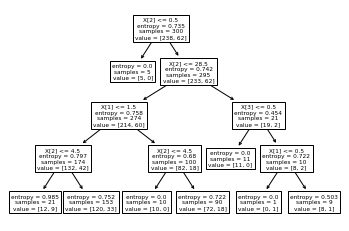

In [56]:
tree.plot_tree(model);

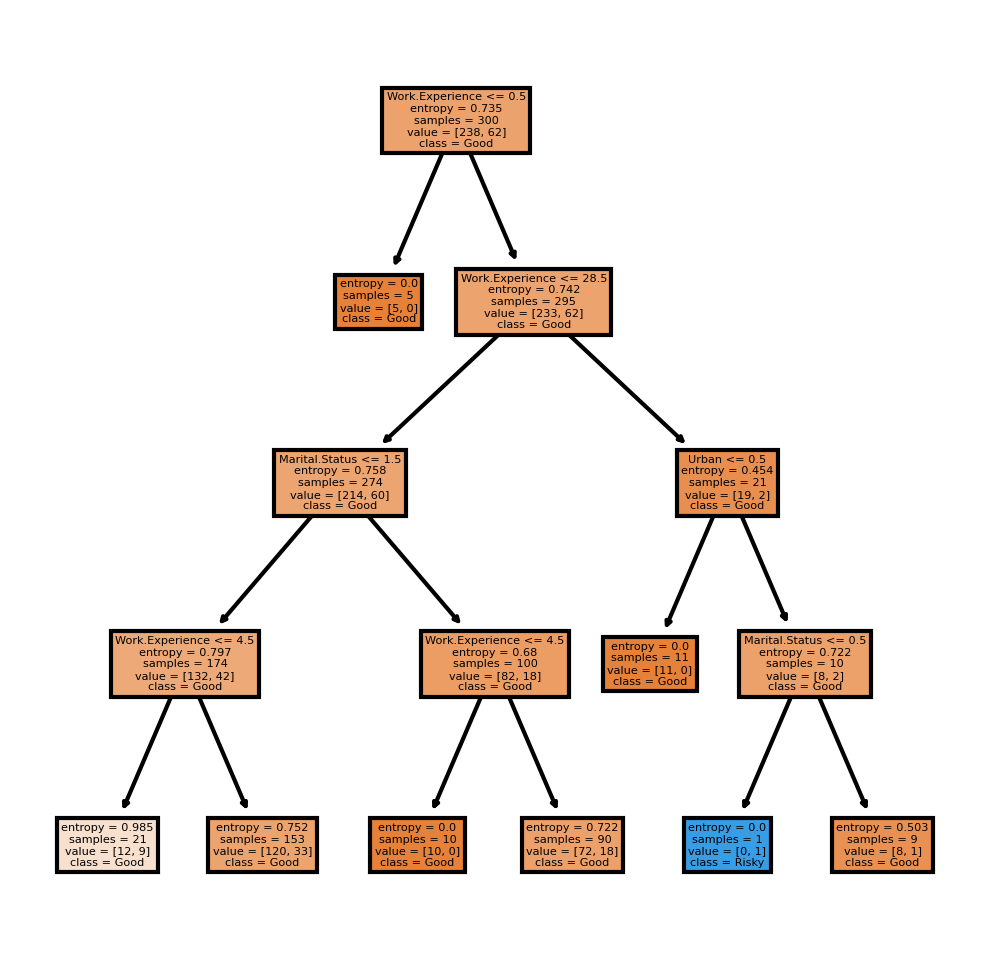

In [57]:
fn=[
 'Undergrad','Marital.Status','Work.Experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [58]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     295
Risky      5
dtype: int64